# MOHAMED EL GUENDOUZ
## Create KPI's

#### Import Mock Data

In [1]:
import pandas as pd

df = pd.read_csv("MOCK_DATA.csv")
df

,id,gender,first_name,last_name,age,email,country,job,salary
0,1,Female,Sander,Gard,47,sgard0@netvibes.com,China,Financial Analyst,4592
1,2,Female,Brody,Gillhespy,47,bgillhespy1@issuu.com,China,Tax Accountant,3969
2,3,Male,Mason,Impy,50,mimpy2@slashdot.org,United States,Editor,5727
3,4,Male,Cam,Syson,38,csyson3@omniture.com,Brazil,Help Desk Technician,4832
4,5,Male,Sheelah,Truwert,43,struwert4@cbsnews.com,Indonesia,Account Representative II,4534
...,...,...,...,...,...,...,...,...,...
862,863,Female,Romona,Moreinis,46,rmoreinisny@stanford.edu,China,Recruiter,4578
863,864,Female,Christel,Ireson,45,ciresonnz@chron.com,Nigeria,Civil Engineer,5424
864,865,Female,Dana,Varcoe,56,dvarcoeo0@google.com,Greece,Clinical Specialist,5164
865,866,Male,Giacinta,Blune,54,gbluneo1@statcounter.com,Haiti,Chemical Engineer,6019


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 9 columns):
id            867 non-null int64
gender        867 non-null object
first_name    867 non-null object
last_name     867 non-null object
age           867 non-null int64
email         867 non-null object
country       867 non-null object
job           867 non-null object
salary        867 non-null int64
dtypes: int64(3), object(6)
memory usage: 61.1+ KB


#### Quality Data

#### What is the gender balance in the company?

In [3]:
df_count_gender = df
df_count_gender["gender"].describe()

count        867
unique         2
top       Female
freq         450
Name: gender, dtype: object

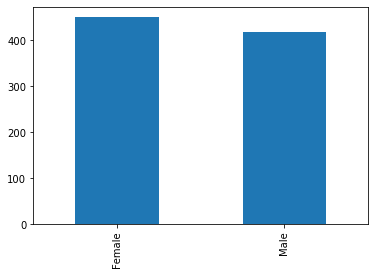

In [4]:
df_count_gender['gender'].value_counts().plot(kind='bar');

### KPI Gender

> KPI = number of gender most frequent / number total of salaries

In [5]:
KPI_Gender = df_count_gender["gender"].describe().freq/df_count_gender["gender"].count()
KPI_Gender

0.5190311418685121

### KPI Wage Gap

$$X = Women's average hourly wage$$
$$Y = Men's average hourly wage$$

$$Wage Gap =100\%-({X\over Y}\times100)$$

In [6]:
X = df[df["gender"] == 'Female']["salary"].sum() / df[df["gender"] == 'Female']["salary"].count()
Y = df[df["gender"] == 'Male']["salary"].sum() / df[df["gender"] == 'Male']["salary"].count()

print("X= "+str(X))
print("Y= "+str(Y))

KPI_Wage_Gap = 1-(X/Y)
print("KPI_Wage_Gap= "+str(KPI_Wage_Gap))

X= 4780.562222222222
Y= 4802.976019184653
KPI_Wage_Gap= 0.00466664769361802


### Visualise Proportion of salaries about Sales department

In [65]:
filterAccountantDepartment = df['job'].str.contains("Accountant")
df = df[filterAccountantDepartment]
df.head(5)

,id,gender,first_name,last_name,age,email,country,job,salary
1,2,Female,Brody,Gillhespy,47,bgillhespy1@issuu.com,China,Tax Accountant,3969
21,22,Male,Eadmund,Kaplan,40,ekaplanl@spotify.com,Monaco,Accountant I,3477
29,30,Male,Elke,Halversen,43,ehalversent@adobe.com,Haiti,Senior Cost Accountant,4538
50,51,Male,Jackie,Olorenshaw,56,jolorenshaw1e@latimes.com,Pakistan,Cost Accountant,6112
72,73,Female,Michail,Leamon,38,mleamon20@slideshare.net,Vietnam,Cost Accountant,3445


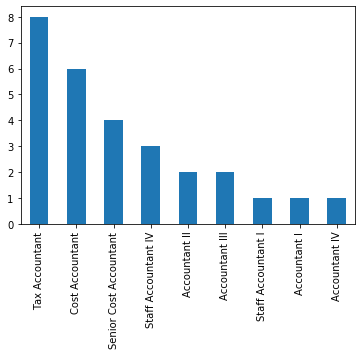

In [66]:
df['job'].value_counts().plot(kind='bar')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002C01A523400>],
      dtype=object)

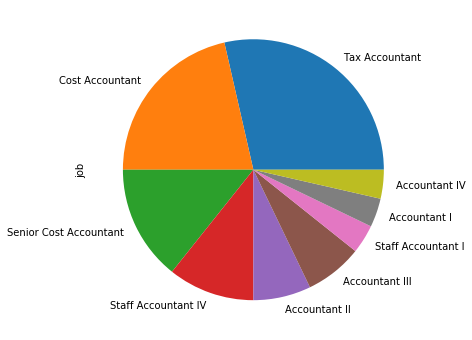

In [67]:
df['job'].value_counts().plot.pie(subplots=True, figsize=(11, 6))

### Wage Average by job

In [68]:
df_salaries_by_job = df.groupby(by=["job"]).mean()["salary"]

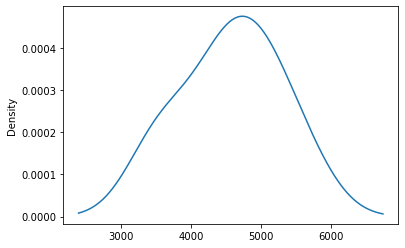

In [69]:
df_salaries_by_job.plot.kde()

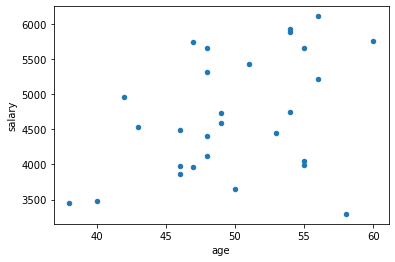

In [70]:
df.plot.scatter(x="age", y="salary");

### Predict Salry in this company

In [88]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = le.fit_transform(df[column_name])
    else:
        pass
df.head()

from sklearn.model_selection import train_test_split

# Taking only the features that is important for now
X = df[['country','gender','job', 'age']]

# Taking the labels (Income)
Y = df['salary']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [89]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

In [93]:
clf.predict([[1,1,8,45]])

array([6485], dtype=int64)